In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from wordcloud import WordCloud

In [2]:
df = pd.read_csv('datasets/subreddit_data.csv')
df

,Subreddit,Title,Body/Text,Author,Score,Creation Time,Number of Comments,URL,Flair,Upvotes,Downvotes,Upvote Ratio
0,mentalhealth,I hate going outside.,Summer is here in my city and i've not been do...,caledenx,2,2023-06-03 17:59:54,0,https://www.reddit.com/r/mentalhealth/comments...,Venting,2,0,1.00
1,mentalhealth,How do I be myself around people that I haven'...,I've always been a shy person. A bit more intr...,bradtohostmemereview,1,2023-06-03 17:58:50,0,https://www.reddit.com/r/mentalhealth/comments...,Need Support,1,0,1.00
2,mentalhealth,I've let my problems get the better of me,I've had a fuxked up past. Parents abusive of ...,coffeeanddissociate,1,2023-06-03 17:56:11,0,https://www.reddit.com/r/mentalhealth/comments...,Venting,1,0,1.00
3,mentalhealth,Finally trying to get back on track,"This past weekend, I had one of the most inten...",YourParadise98,1,2023-06-03 17:51:18,0,https://www.reddit.com/r/mentalhealth/comments...,NaN,1,0,1.00
4,mentalhealth,Residential treatment,I’m going to be staying at a residential facil...,Commission-Exact,1,2023-06-03 17:47:17,0,https://www.reddit.com/r/mentalhealth/comments...,NaN,1,0,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...
74183,ADHDsupport,First few days on 27mg Concerta and hating it,I need some advice. I'm 30 years old and was j...,Danger_17,2,2014-10-07 15:27:27,2,https://www.reddit.com/r/ADHDSupport/comments/...,NaN,2,0,1.00
74184,ADHDsupport,Android Phone? Google Keep,NaN,rabidbob,3,2014-09-09 04:05:37,0,http://www.reddit.com/r/ADHD/comments/2fu4iw/f...,NaN,3,0,1.00
74185,ADHDsupport,Lionflower13's 5 every day things for success ...,NaN,rabidbob,2,2014-09-09 04:02:44,0,http://www.reddit.com/r/ADHD/comments/2fq446/f...,NaN,2,0,1.00
74186,ADHDsupport,The Secret Weapon: Evernote as an organisation...,NaN,rabidbob,3,2014-09-09 03:52:54,4,http://www.thesecretweapon.org/,NaN,2,1,0.81


In [3]:
df.shape

(74188, 12)

In [4]:
# Data Overview
num_posts = len(df)
num_subreddits = len(df['Subreddit'].unique())
time_range = f"{df['Creation Time'].min()} to {df['Creation Time'].max()}"
print(f"Total Posts: {num_posts}")
print(f"Total Subreddits: {num_subreddits}")
print(f"Time Range: {time_range}")

Total Posts: 74188
Total Subreddits: 98
Time Range: 2009-01-14 11:54:02 to 2023-06-03 19:18:43


In [5]:
df.isnull().mean()

Subreddit             0.000000
Title                 0.000000
Body/Text             0.144080
Author                0.000000
Score                 0.000000
Creation Time         0.000000
Number of Comments    0.000000
URL                   0.000000
Flair                 0.578962
Upvotes               0.000000
Downvotes             0.000000
Upvote Ratio          0.000000
dtype: float64

In [6]:
df = df.dropna(subset=['Body/Text'])
df.isnull().mean()

Subreddit             0.000000
Title                 0.000000
Body/Text             0.000000
Author                0.000000
Score                 0.000000
Creation Time         0.000000
Number of Comments    0.000000
URL                   0.000000
Flair                 0.553316
Upvotes               0.000000
Downvotes             0.000000
Upvote Ratio          0.000000
dtype: float64

In [7]:
df.shape

(63499, 12)

In [8]:
df.duplicated().sum()

363

In [9]:
df = df.drop_duplicates()

In [10]:
df.duplicated().sum()

0

In [11]:
data = df

In [12]:
# Data Overview
num_posts = len(df)
num_subreddits = len(df['Subreddit'].unique())
time_range = f"{df['Creation Time'].min()} to {df['Creation Time'].max()}"
print(f"Total Posts: {num_posts}")
print(f"Total Subreddits: {num_subreddits}")
print(f"Time Range: {time_range}")

Total Posts: 63136
Total Subreddits: 97
Time Range: 2010-12-13 18:48:02 to 2023-06-03 19:18:43


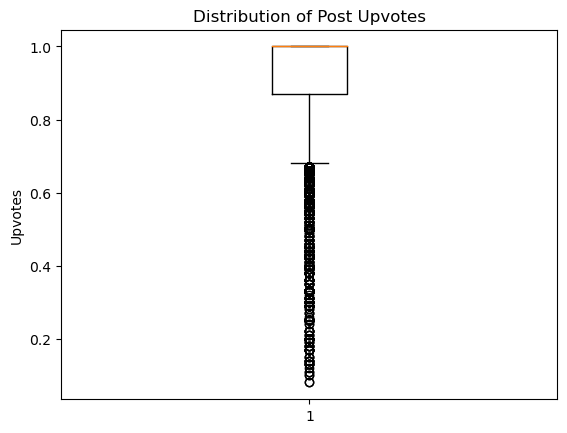

In [13]:
# Box Plot

plt.boxplot(df["Upvote Ratio"])
plt.ylabel("Upvotes")
plt.title("Distribution of Post Upvotes")
plt.show()

In [14]:
df['Flair'].unique()

array(['Venting', 'Need Support', nan, 'Opinion / Thoughts', 'Question',
       'Resources', 'Inspiration / Encouragement', 'Good News / Happy',
       'Sadness / Grief', 'advice',
       'what is abnormal with me? NOT SEEKING FOR A DIAGNOSIS',
       'Advice Needed', 'Needs A Hug/Support', 'Medication',
       'DAE Questions', 'Discussion', 'Help A Loved One', 'Health',
       'Family/Relationship', 'Helpful Tips!', 'Work/School', 'Therapy',
       'Driving', 'Share Your Victories', 'Sleep', 'Anxiety Resource',
       'Lifestyle', 'Progress!', 'Uplifting', 'Trigger Warning',
       'Recovery Story', 'Travel', 'Introduction', 'Support', 'Advice',
       'TW: ...', 'Success!', 'TW: Suicide', 'TW: CSA/SA/Pedophilia',
       'TW: Sexual Abuse', 'TW: Fla****cks',
       'TW: ...Abuse mentions, stalking, SI, SH, harassment',
       'TW:  This is a vent post but I am looking for support ',
       'Resource', 'TW: Suicide and PTSD', 'TW: Rape', 'TW: suicide ',
       'TW: mentions of suicide'

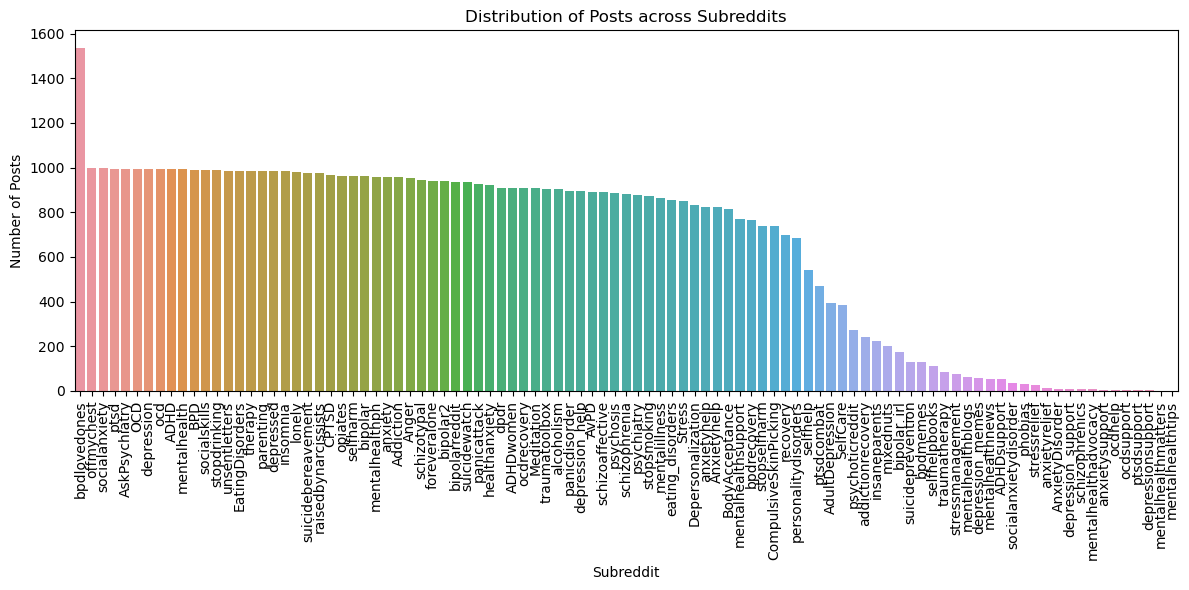

In [15]:
# Post Distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='Subreddit', data=df, order=df['Subreddit'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Subreddit')
plt.ylabel('Number of Posts')
plt.title('Distribution of Posts across Subreddits')
plt.tight_layout()
plt.show()

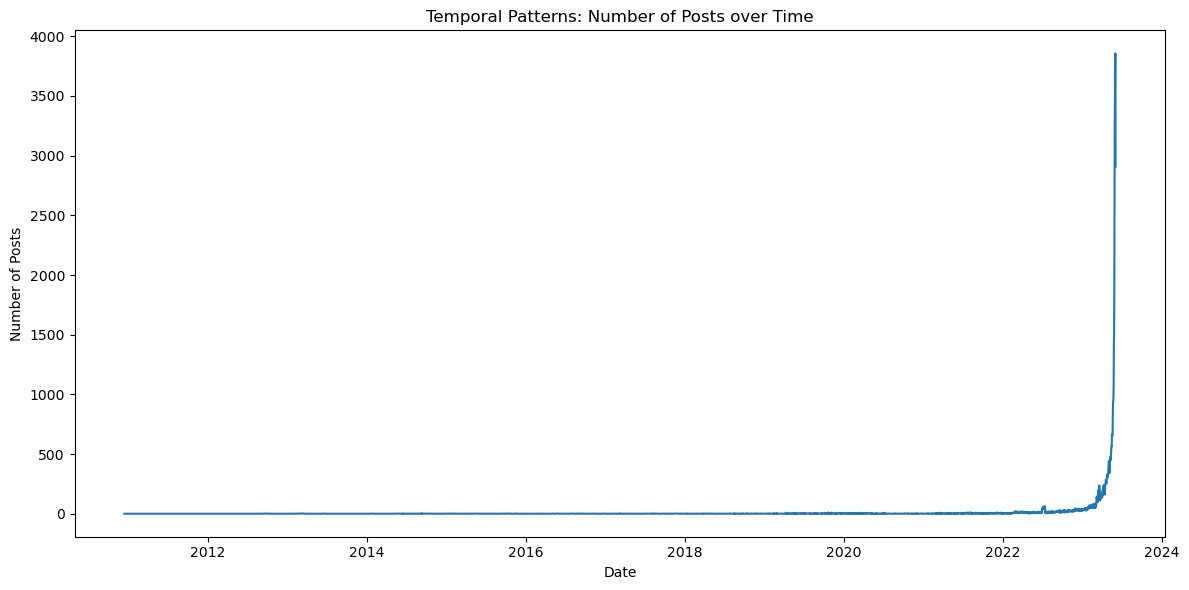

In [16]:
# Temporal Patterns
data['Creation Time'] = pd.to_datetime(data['Creation Time'])
data['Date'] = data['Creation Time'].dt.date
daily_posts = data.groupby('Date').size()

plt.figure(figsize=(12, 6))
sns.lineplot(x=daily_posts.index, y=daily_posts.values)
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.title('Temporal Patterns: Number of Posts over Time')
plt.tight_layout()
plt.show()


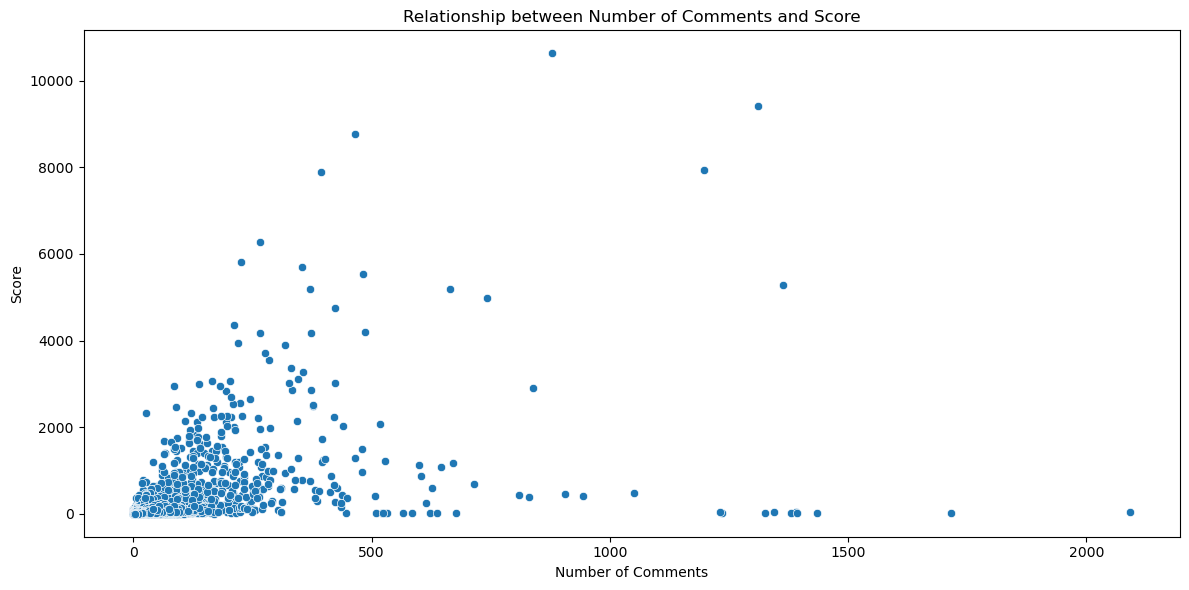

In [17]:
# Comments and Upvotes
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Number of Comments', y='Score', data=data)
plt.xlabel('Number of Comments')
plt.ylabel('Score')
plt.title('Relationship between Number of Comments and Score')
plt.tight_layout()
plt.show()


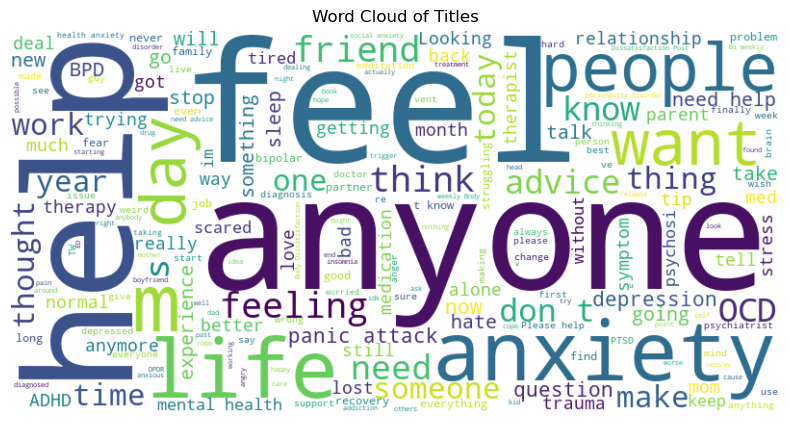

In [18]:
# Word Cloud of Titles

# Combine all titles into a single string
titles = ' '.join(data['Title'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(titles)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Titles')
plt.show()

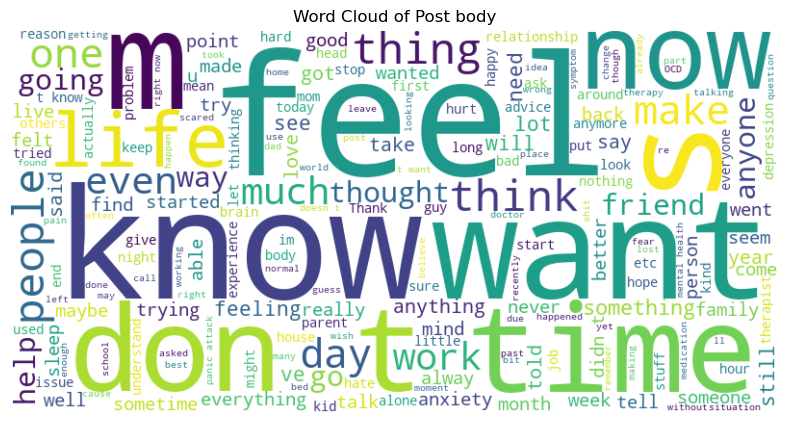

In [19]:
# Word Cloud of Post body

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(data['Body/Text']))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Post body')
plt.show()

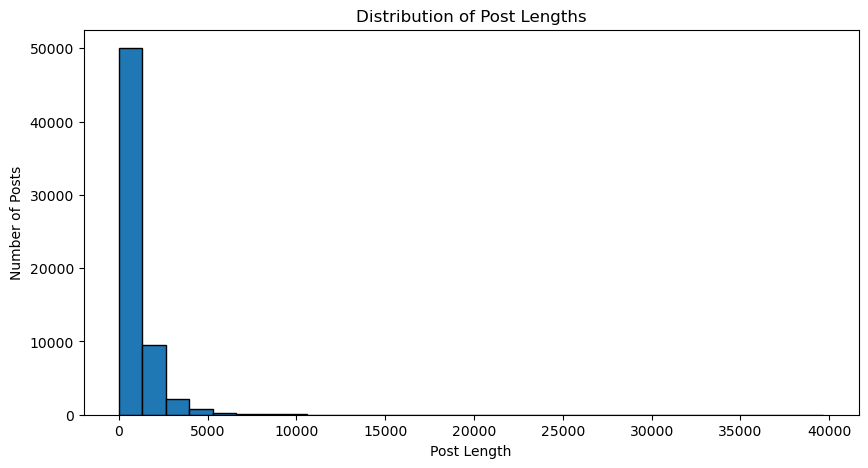

In [20]:
# Compute the length of each post
data['Post Length'] = data['Body/Text'].str.len()

# Plot the histogram
plt.figure(figsize=(10, 5))
plt.hist(data['Post Length'], bins=30, edgecolor='k')
plt.xlabel('Post Length')
plt.ylabel('Number of Posts')
plt.title('Distribution of Post Lengths')
plt.show()

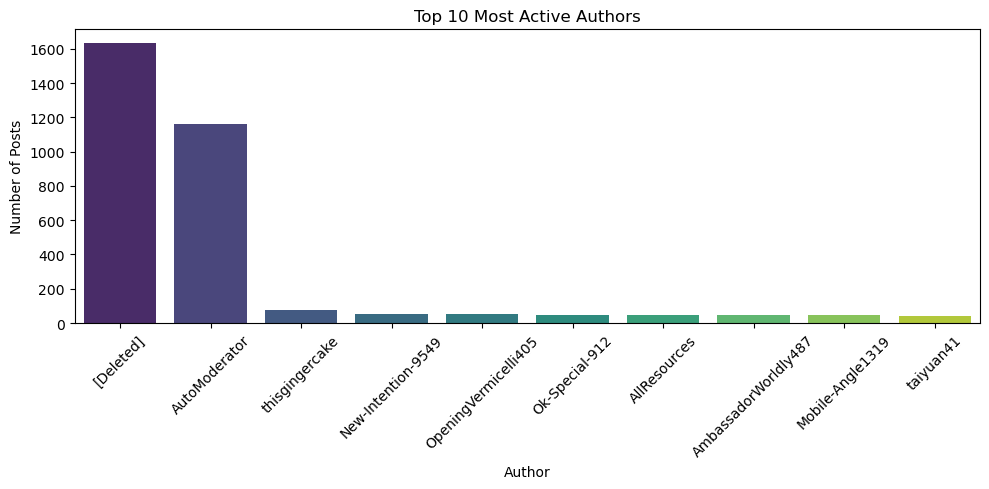

In [21]:
# Top 10 most active authors
top_authors = data['Author'].value_counts().nlargest(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_authors.index, y=top_authors.values, palette='viridis')
plt.xticks(rotation=45)
plt.xlabel('Author')
plt.ylabel('Number of Posts')
plt.title('Top 10 Most Active Authors')
plt.tight_layout()
plt.show()

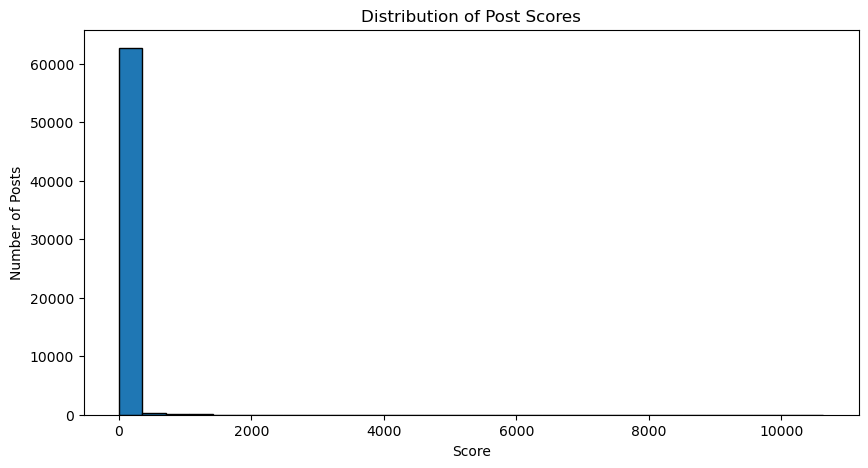

In [22]:
# Plot the histogram of scores
plt.figure(figsize=(10, 5))
plt.hist(data['Score'], bins=30, edgecolor='k')
plt.xlabel('Score')
plt.ylabel('Number of Posts')
plt.title('Distribution of Post Scores')
plt.show()


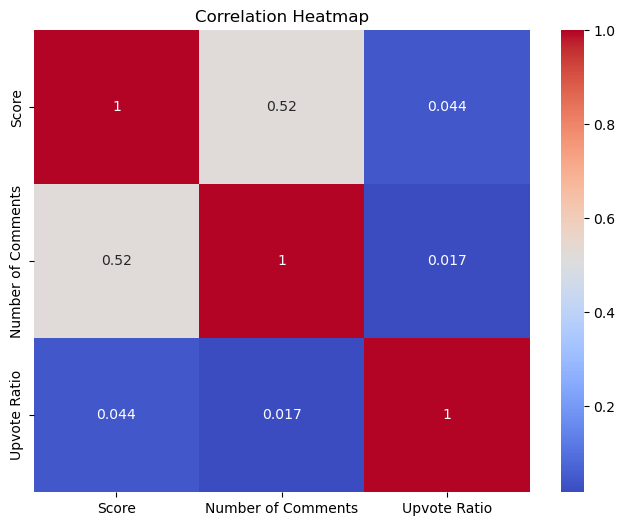

In [23]:
# Select numerical columns for correlation analysis
numeric_columns = ['Score', 'Number of Comments', 'Upvote Ratio']

# Compute the correlation matrix
correlation_matrix = data[numeric_columns].corr()

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


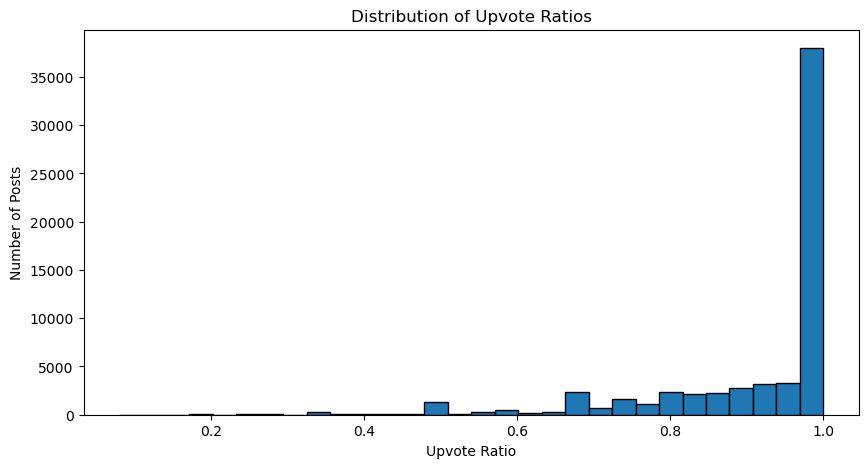

In [24]:
# Plot the histogram of upvote ratios
plt.figure(figsize=(10, 5))
plt.hist(data['Upvote Ratio'], bins=30, edgecolor='k')
plt.xlabel('Upvote Ratio')
plt.ylabel('Number of Posts')
plt.title('Distribution of Upvote Ratios')
plt.show()


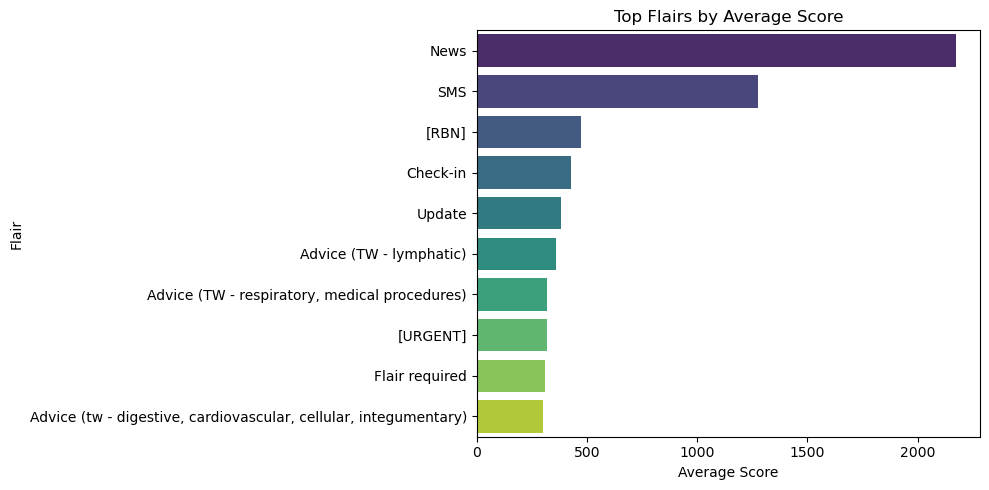

In [25]:
# Compute the average score for each flair
average_score_by_flair = data.groupby('Flair')['Score'].mean().nlargest(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=average_score_by_flair.values, y=average_score_by_flair.index, palette='viridis')
plt.xlabel('Average Score')
plt.ylabel('Flair')
plt.title('Top Flairs by Average Score')
plt.tight_layout()
plt.show()


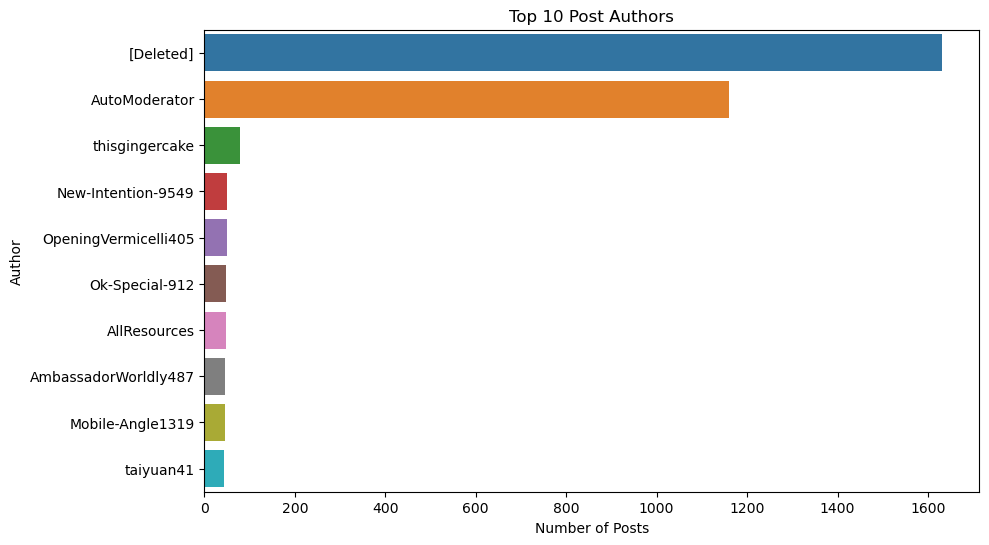

In [26]:
# Get the top 10 post authors
top_authors = data['Author'].value_counts().nlargest(10)

# Plot the bar chart of top post authors
plt.figure(figsize=(10, 6))
sns.barplot(x=top_authors.values, y=top_authors.index)
plt.xlabel('Number of Posts')
plt.ylabel('Author')
plt.title('Top 10 Post Authors')
plt.show()


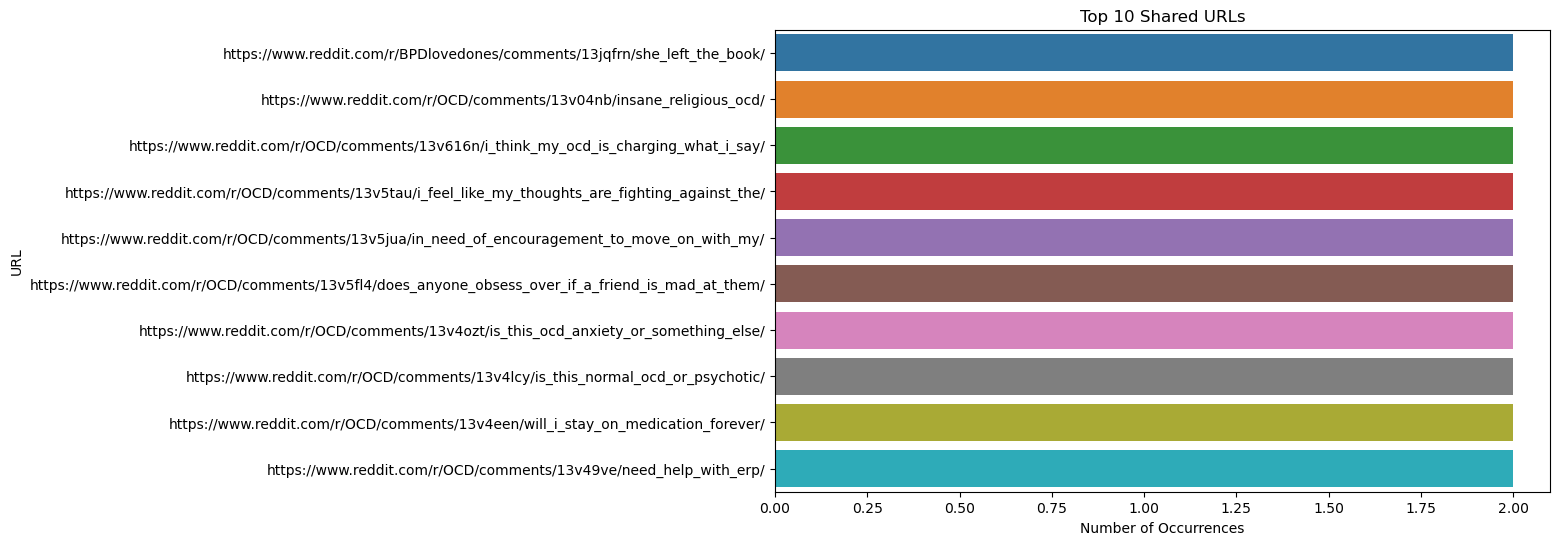

In [27]:
# Get the top 10 shared URLs
top_urls = data['URL'].value_counts().nlargest(10)

# Plot the bar chart of top shared URLs
plt.figure(figsize=(10, 6))
sns.barplot(x=top_urls.values, y=top_urls.index)
plt.xlabel('Number of Occurrences')
plt.ylabel('URL')
plt.title('Top 10 Shared URLs')
plt.show()
